In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Magic command to display inline
%matplotlib inline

## View image with OpenCV: `cv2.imshow()`

### The image can be sliced to trim it, which is useful for focusing on specific areas of the image.

In [3]:
# Read image
image = cv2.imread('../images/nature.jpg')

# Show full image and its slicing
cv2.imshow("Image", image)
cv2.waitKey(0)

# Slicing the image to focus on a specific area
image_crop = image[50:150, 500:700]
cv2.imshow("Slicing of the image", image_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:

print(f'Shape of colorful image: {image.shape}')
print(f'Type of colorful image: {type(image)}')
print(f'Type of each pixel is: {type(image[0,0,0])}')

Shape of colorful image: (400, 650, 3)
Type of colorful image: <class 'numpy.ndarray'>
Type of each pixel is: <class 'numpy.uint8'>


### Read a grayscale image and display it using OpenCV

In [13]:
image_gray = cv2.imread('../images/nature.jpg', 0)
cv2.imshow("Gray", image_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f'Shape of grayscale image: {image_gray.shape}')

Shape of grayscale image: (400, 650)


## Rotate image with NumPy: `np.rot90()`

### We can pass arguments to `np.rot90()`, defaulting to 1 rotation (90 degrees), 2 rotations (180 degrees), or 3 rotations (270 degrees). The `k` parameter specifies the number of times to rotate the image by 90 degrees.

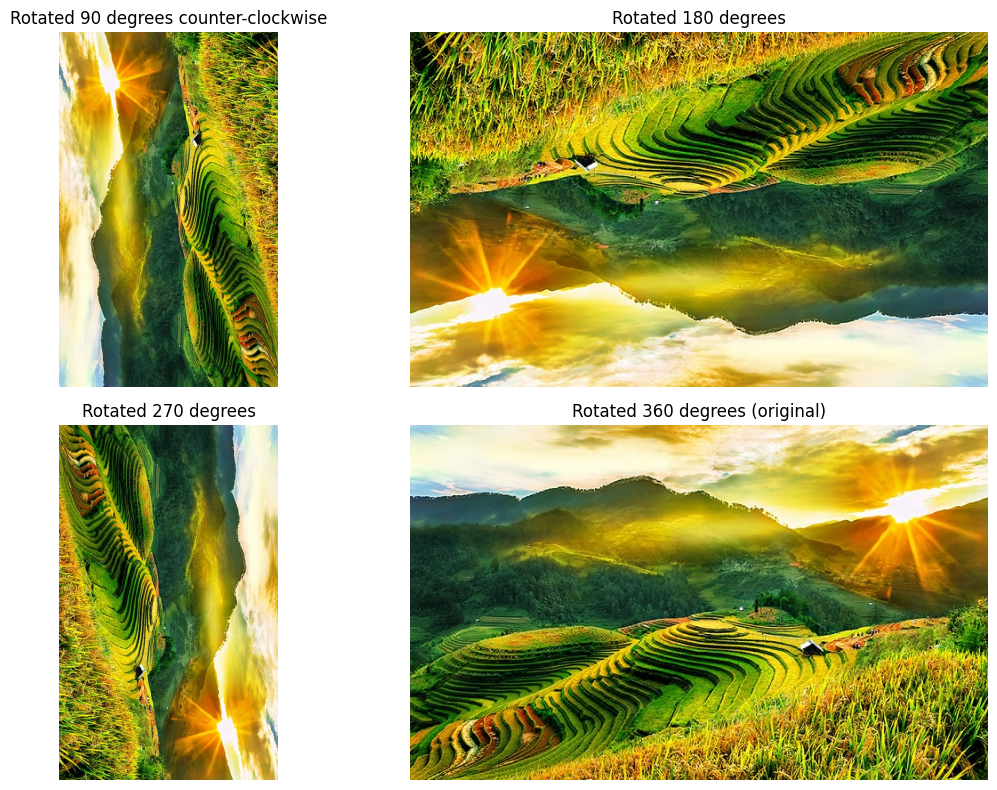

In [14]:
# Convert image to RGB for display because OpenCV loads images in BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rot_90 = np.rot90(image_rgb, k=1)
image_rot_180 = np.rot90(image_rgb, k=2)
image_rot_270 = np.rot90(image_rgb, k=3)
image_rot_360 = np.rot90(image_rgb, k=4)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].imshow(image_rot_90)
axes[0, 0].set_title("Rotated 90 degrees counter-clockwise")
axes[0, 1].imshow(image_rot_180)
axes[0, 1].set_title("Rotated 180 degrees")
axes[1, 0].imshow(image_rot_270)
axes[1, 0].set_title("Rotated 270 degrees")
axes[1, 1].imshow(image_rot_360)
axes[1, 1].set_title("Rotated 360 degrees (original)")
for ax in axes.flat:
    ax.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

### Tranpose image

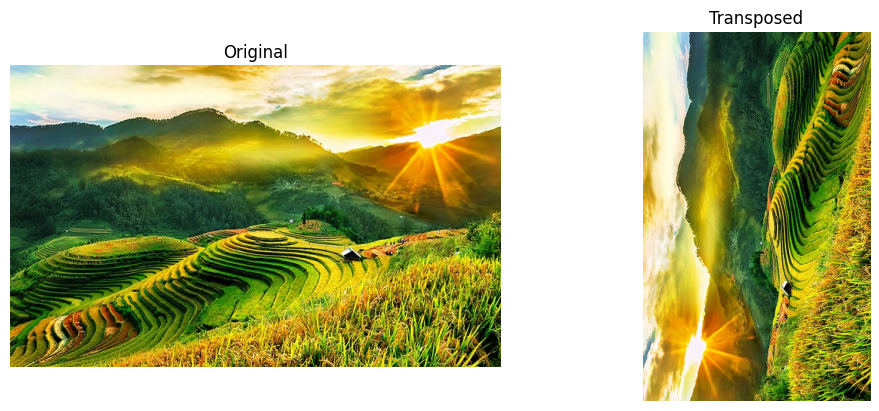

In [15]:
# Arguments for image.tranpose() are (axes) where axes is a tuple of integers that specifies the order of the dimensions.
# For example, to transpose an image from (height, width, channels) to (width, height, channels), we can use (1, 0, 2).
image_rgb_transposed = image_rgb.transpose((1, 0, 2))  # Transpose the image

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
axes[0].imshow(image_rgb)  # already RGB
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(image_rgb_transposed)
axes[1].set_title("Transposed")
axes[1].axis("off")

plt.show()

## 'Plus' image

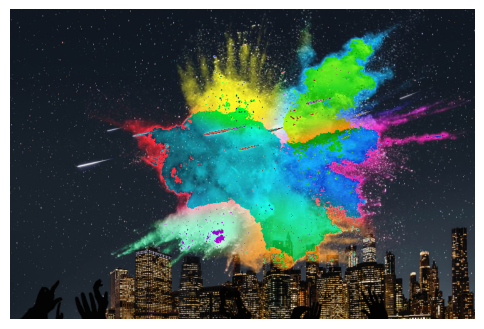

In [16]:
image_1 = plt.imread('../images/colorfull-1.jpg')
image_2 = plt.imread('../images/colorfull-2.jpg')

# Resize image_2 to match image_1's shape
image_2_resized = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]))

image_plus = image_1 + image_2_resized

plt.figure(figsize=(6,6))
plt.imshow(image_plus)
plt.axis('off')
plt.show()

## Increase/Decrease brightness
Because OpenCV images contain uint8 pixel values (range [0,255]), so we must convert to float to avoid overflow when adding or subtracting brightness values. After processing, we convert back to uint8.

We can implement in 3 ways: `loop`, `np.clip()`, and `np.where()`.
- Example of using `loop`:
```python
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            image[i, j, k] = np.clip(image[i, j, k] + brightness, 0, 255)
```
- Example of using `np.clip()` in the cell below
- Example of using `np.where()`:
```python
image = np.where(image + brightness > 255, 255, image + brightness)
```

### Increase brightness

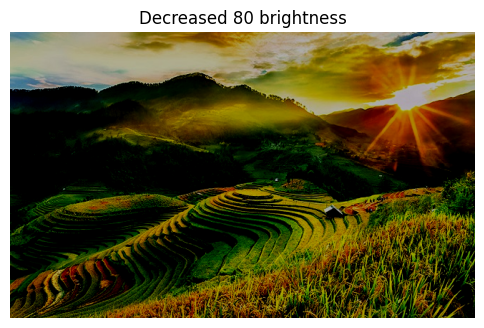

In [21]:
image_bright_dec80 = image_rgb.copy()
image_bright_dec80 = image_bright_dec80.astype(float)

image_bright_dec80 -= 80
image_bright_dec80 = np.clip(image_bright_dec80, 0, 255)
image_bright_dec80 = image_bright_dec80.astype(np.uint8)

plt.imsave('../images/decrease80_clip.jpg', image_bright_dec80)
plt.figure(figsize=(6,6))
plt.imshow(image_bright_dec80)
plt.title("Decreased 80 brightness")
plt.axis('off')
plt.show()


### Decrease brightness

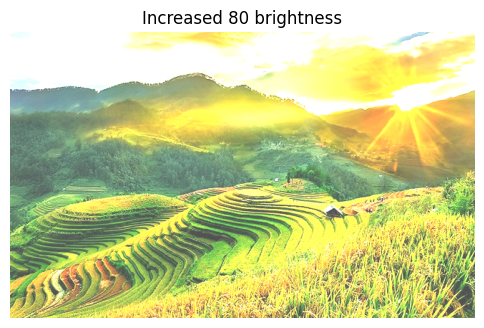

In [22]:
image_bright_inc80 = image_rgb.copy()
image_bright_inc80 = image_bright_inc80.astype(float)

image_bright_inc80 += 80
image_bright_inc80 = np.clip(image_bright_inc80, 0, 255)
image_bright_inc80 = image_bright_inc80.astype(np.uint8)

plt.imsave('../images/increase80_clip.jpg', image_bright_inc80)
plt.figure(figsize=(6,6))
plt.imshow(image_bright_inc80)
plt.title("Increased 80 brightness")
plt.axis('off')
plt.show()


## Background subtraction (or foreground extraction)

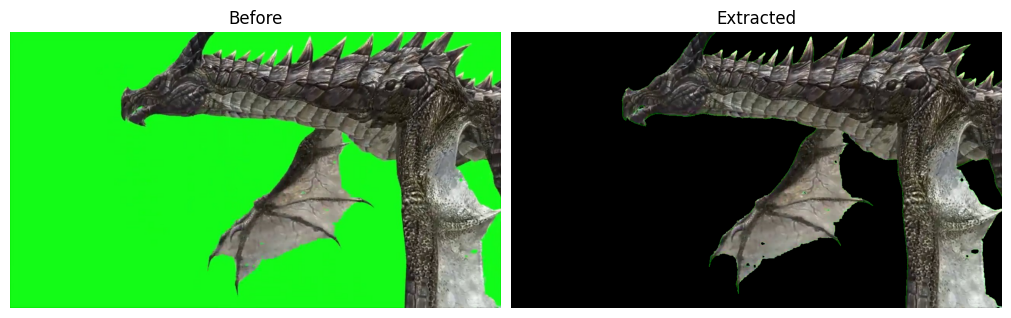

In [56]:
img = plt.imread('../images/maxresdefault.jpg')
rgb8 = (img * 255.0).round().astype(np.uint8) if np.issubdtype(img.dtype, np.floating) else img

target = np.array([19, 252, 23], dtype=np.int16)
tol = 100  # adjust tolerance

diff = np.abs(rgb8.astype(np.int16) - target)           # avoid uint8 wrap
is_green = (diff <= tol).all(axis=2)                    # True where green

# NOTE: flip np.where arms so green → 0, subject → original
extracted = np.where(is_green[..., None], 0, rgb8).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
ax[0].imshow(rgb8);      ax[0].set_title('Before');    ax[0].axis('off')
ax[1].imshow(extracted); ax[1].set_title('Extracted'); ax[1].axis('off')
plt.show()

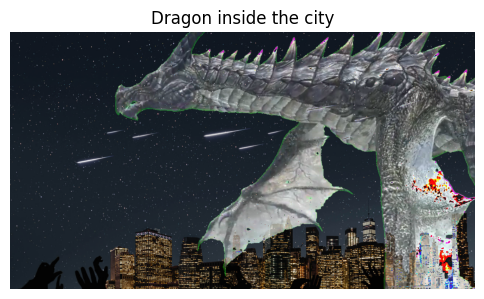

In [58]:
image_city = plt.imread('../images/colorfull-2.jpg')
# Resize extracted to match image_city's shape
image_dragon = cv2.resize(extracted, (image_city.shape[1], image_city.shape[0]))

image_city_w_dragon = image_city + image_dragon

plt.figure(figsize=(6,6))
plt.imshow(image_city_w_dragon)
plt.title("Dragon inside the city")
plt.axis('off')
plt.show()